In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np


In [94]:
data = pd.read_csv('adult_data.csv')

data.head()

,Age,WorkClass,FinalWieght,Education,EducationYears,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGains,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Less than 50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Less than 50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Less than 50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Less than 50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Less than 50K


This dataset has 15 attributes and 48842 instances.

In [95]:
data = data[data['WorkClass'] != ' ?']
data['WorkClass'].value_counts()


WorkClass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

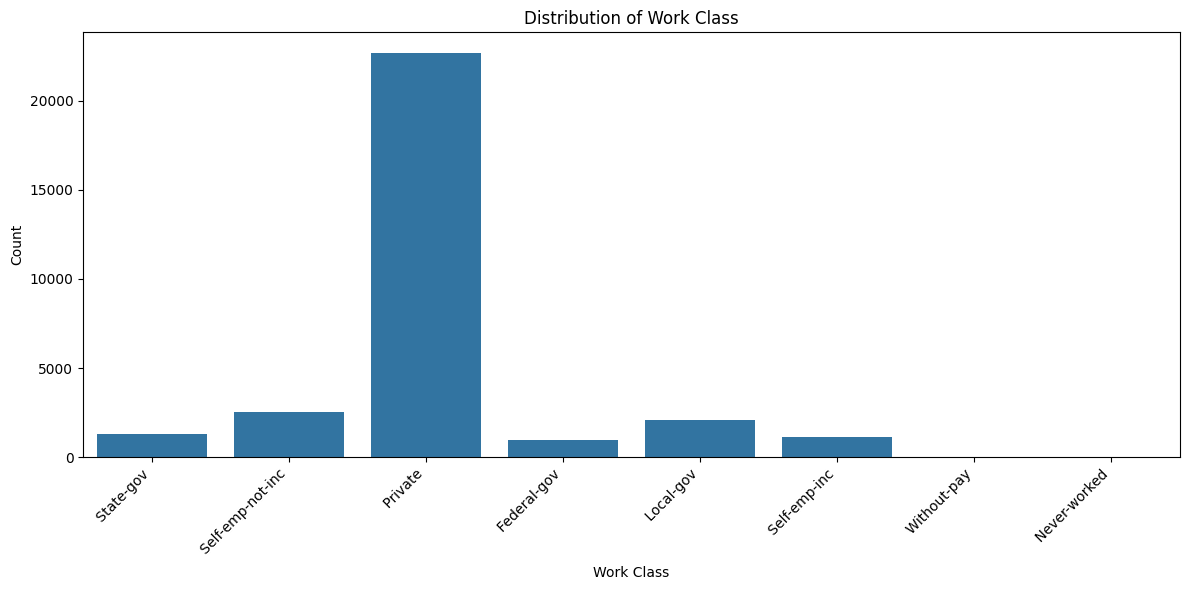

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='WorkClass')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Work Class')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

 ### Key insights from the Work Class distribution:
  - Private sector employment dominates with over 22,000 individuals
  - Self-employed (not incorporated) is the second largest category with around 2,500 people
  - Government jobs (Local, State, Federal) collectively make up a significant portion
  - Very few people are without pay or never worked (less than 25 combined)
  - The distribution shows a clear preference for traditional employment (private sector) over self-employment
  - Government employment at various levels provides stable work for a notable segment
  - The extremely low numbers in 'Without-pay' and 'Never-worked' suggest most people are actively participating in the workforce


The majority of the population in this census data is from the Private sector.

In [97]:
data['Education'].value_counts()

Education
 HS-grad         9969
 Some-college    6777
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1057
 Assoc-acdm      1020
 10th             833
 7th-8th          574
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: count, dtype: int64

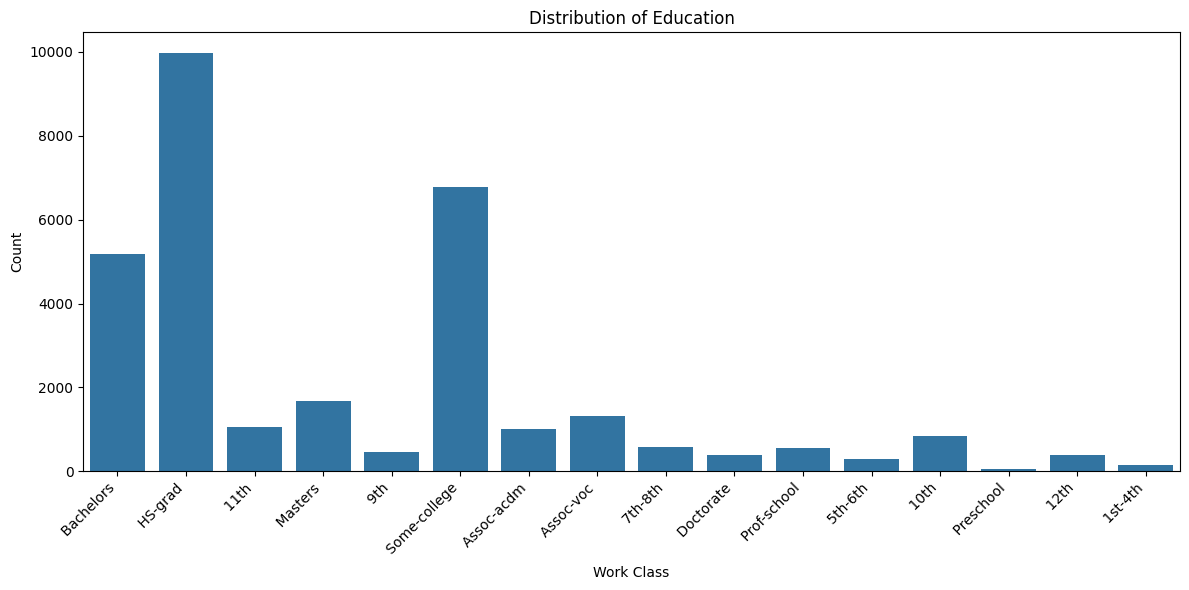

In [98]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Education')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Education')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Key insights from the Education distribution:
 - HS-grad (High School graduates) form the largest group with nearly 10,000 individuals
 - Some-college is the second most common category with around 6,800 people
 - Bachelors degree holders make up the third largest group with about 5,200 individuals
 - There's a significant drop after these top 3 categories
 - Advanced degrees (Masters, Professional School, Doctorate) collectively represent a smaller portion
 - Lower education levels (Preschool through 9th grade) have relatively few individuals
 - The distribution suggests that the majority of the population has at least a high school education
 - Only a small fraction has less than a high school education


Approximately 70% of the population has a Bachelor's degree or higher.

In [99]:
data['MaritalStatus'].value_counts()

MaritalStatus
 Married-civ-spouse       14340
 Never-married             9917
 Divorced                  4259
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: count, dtype: int64

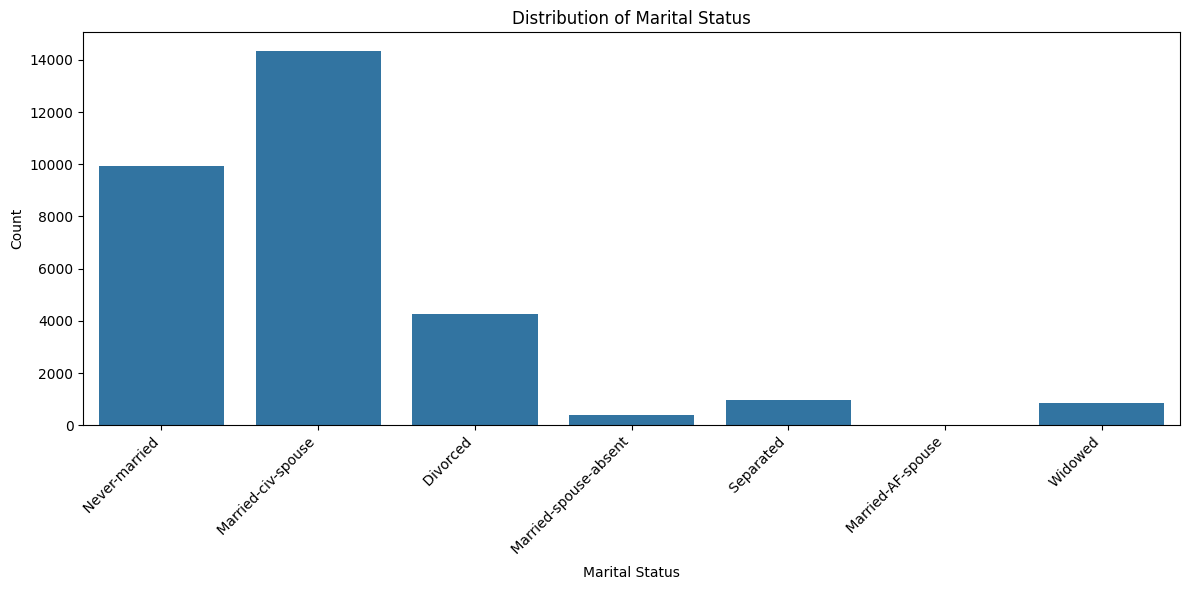

In [100]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='MaritalStatus')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Key insights from the Marital Status distribution:
- Married-civ-spouse is by far the most common category with over 14,000 individuals
- Never-married is the second most common status with nearly 10,000 individuals
- Divorced individuals make up the third largest group with around 4,000 people
- There are relatively few separated, widowed, and married-spouse-absent individuals
- Married-AF-spouse (Armed Forces) is extremely rare with only 21 cases
- The distribution is heavily skewed towards married civilians, representing about 47% of the total population

In [101]:
data = data[data['Occupation'] != ' ?']
data['Occupation'].value_counts()

Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

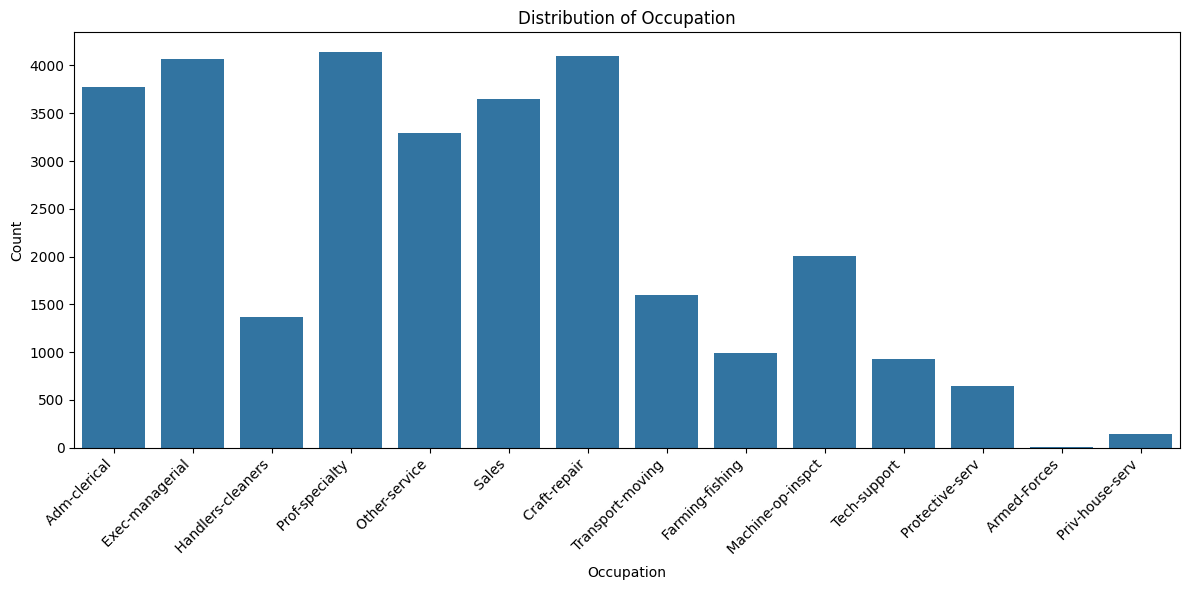

In [102]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Occupation')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### The distribution of occupations shows that:
 - Professional specialty, craft repair, and executive-managerial positions are the most common occupations, each with around 4,000 workers
 - Administrative/clerical and sales positions follow closely behind
 - There are very few private household service workers and armed forces members in the dataset
 - The distribution is somewhat uneven, with the top 5-6 occupations making up the majority of the workforce
 - Technical, protective services and farming/fishing occupations are in the middle range with 600-1000 workers each




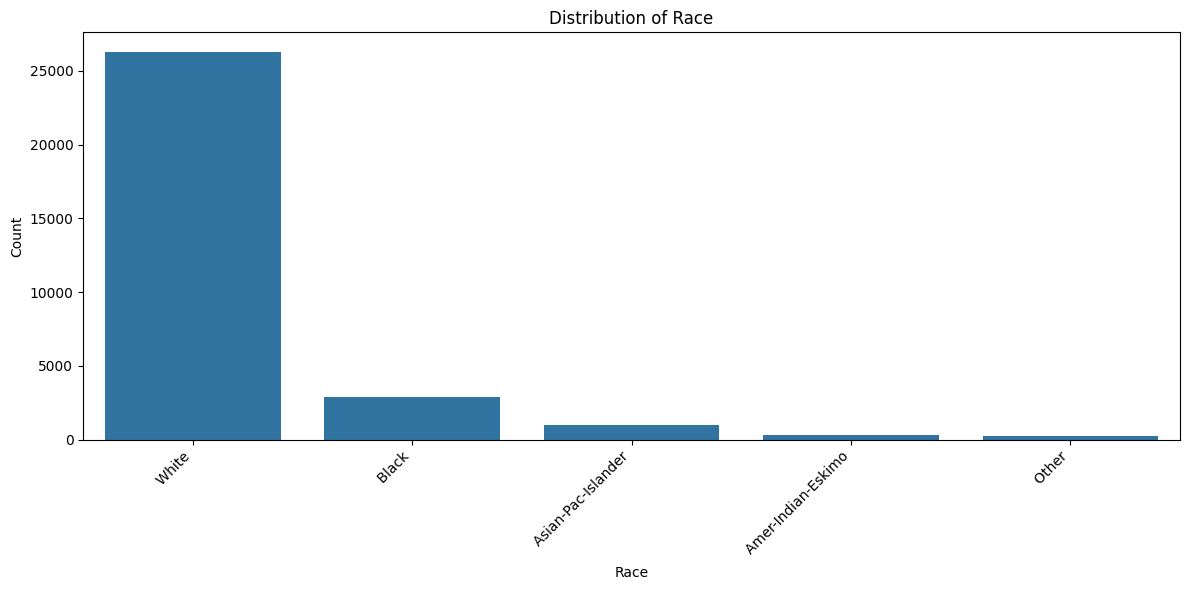

In [103]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Race')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### The distribution of race shows that:
 - White individuals make up the vast majority of the dataset, indicating a significant racial imbalance
 - Black and Asian-Pac-Islander individuals form the next largest groups, but at much lower numbers
 - American Indians/Aleut Eskimos have very low representation in the dataset
 - Other races also have minimal representation
 - This distribution suggests potential sampling bias or reflects historical workforce demographics from when the data was collected


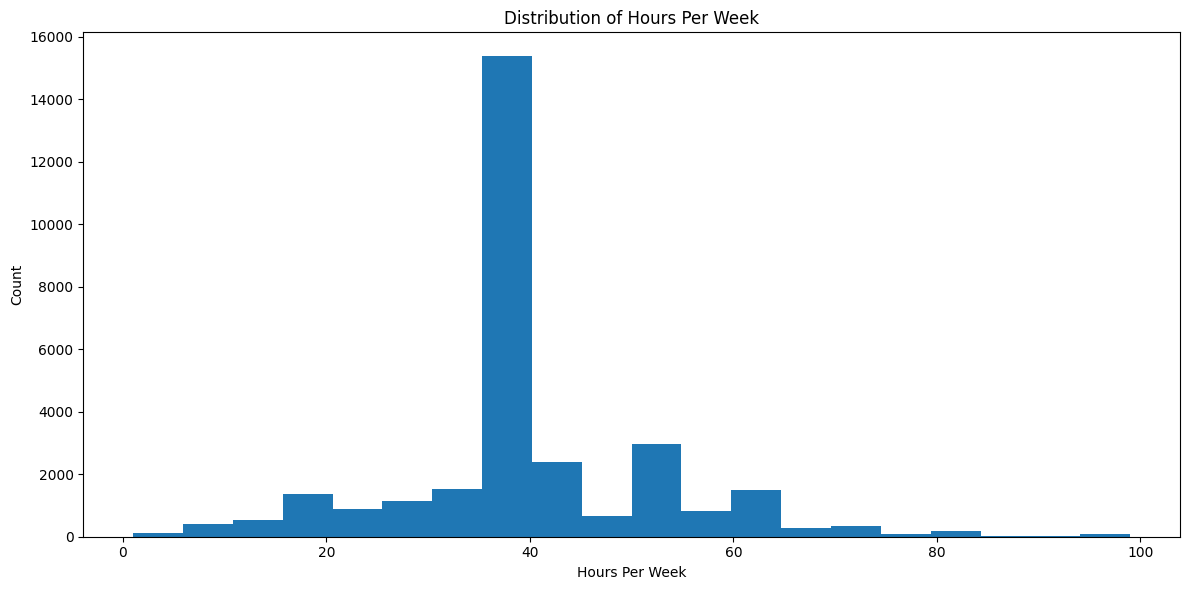

In [104]:
# Create bins for hours per week
plt.figure(figsize=(12, 6))
plt.hist(data['HoursPerWeek'], bins=20)
plt.title('Distribution of Hours Per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### The distribution of hours worked per week shows that:
  - There is a very strong peak around 40 hours per week, which represents the standard full-time work week
  - The distribution is right-skewed, with a long tail extending towards higher hours
  - There are some people working part-time hours (less than 40 hours)
  - A notable number of people work more than 40 hours, with some working up to 80+ hours per week
  - The distribution suggests that while 40 hours is the norm, there is significant variation in work schedules
  - Very few people work extremely low hours (less than 20) or extremely high hours (more than 80)
  - The shape indicates that most jobs in the dataset are traditional full-time positions


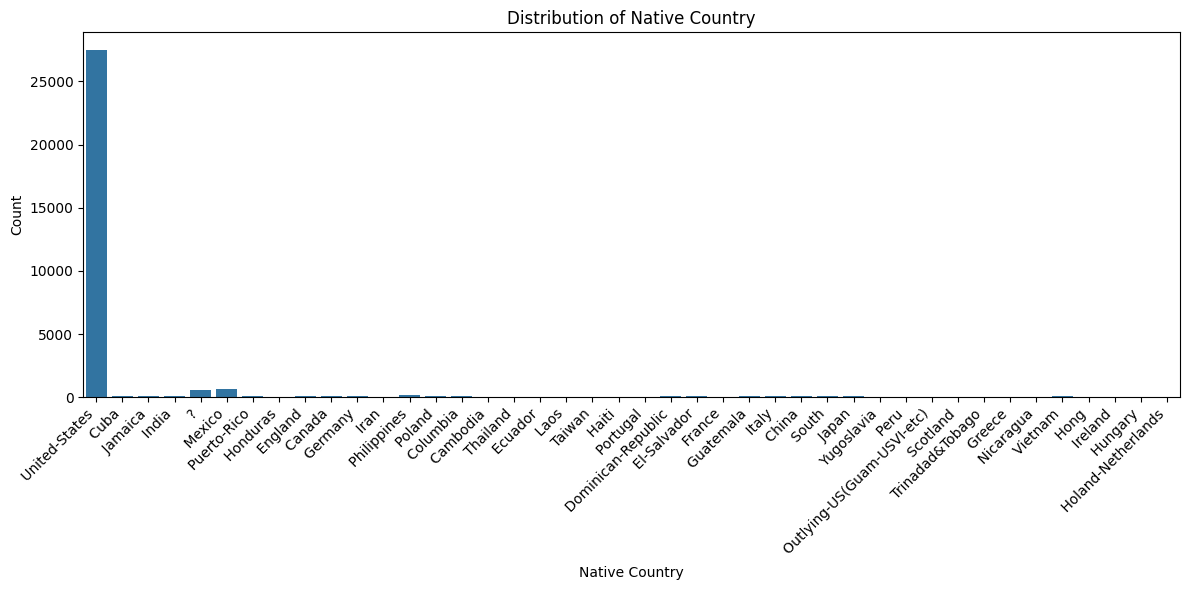

In [105]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='NativeCountry')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Native Country')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### The distribution of native countries shows that:
   - The United States dominates the dataset with a vast majority of individuals
   - Mexico represents the second largest group, but at a much smaller scale
   - Other countries have relatively small representation in comparison
   - There appears to be a diverse set of countries represented, but with very uneven distribution
   - The imbalanced distribution likely reflects:
     - Immigration patterns to the US during the data collection period
     - The focus of the dataset on US workforce demographics
     - Potential sampling biases in data collection
   - The low counts for most non-US countries may limit the model's ability to make reliable predictions for immigrants from those nations
   - This distribution suggests the model may be most reliable for US-born individuals


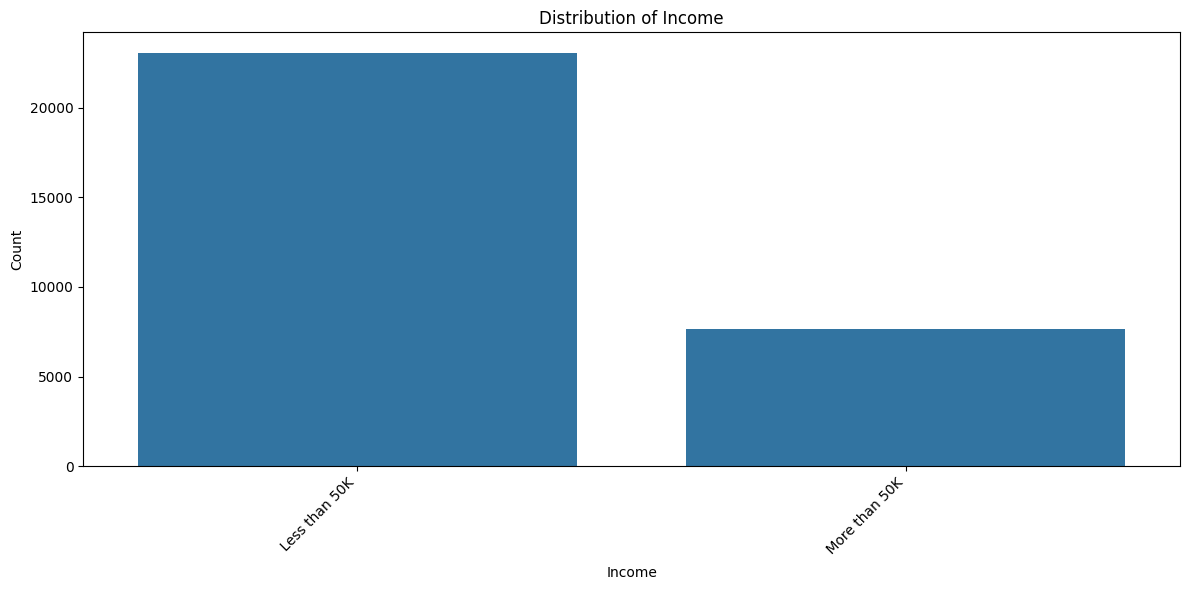

In [106]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Income')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### The distribution of income shows that:
   - There is a significant class imbalance in the dataset
   - The majority of individuals (approximately 75%) earn <=50K per year
   - A smaller portion (approximately 25%) earn >50K per year
   - This imbalance suggests:
     - The dataset may reflect typical income distributions of the time period
     - The model will need to account for class imbalance during training
     - Predictions may be biased toward the majority class (<=50K)
   - The binary nature of the income classification simplifies the modeling task
   - Care must be taken to ensure the model can effectively identify high-income individuals despite their lower representation
   - Techniques like class weights or resampling may be needed to address the imbalance


In [110]:
data['Income_transform'] = data['Income'].map({' Less than 50K': 0, ' More than 50K': 1})

data.head()


,Age,WorkClass,FinalWieght,Education,EducationYears,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGains,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_transform
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Less than 50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Less than 50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Less than 50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Less than 50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Less than 50K,0


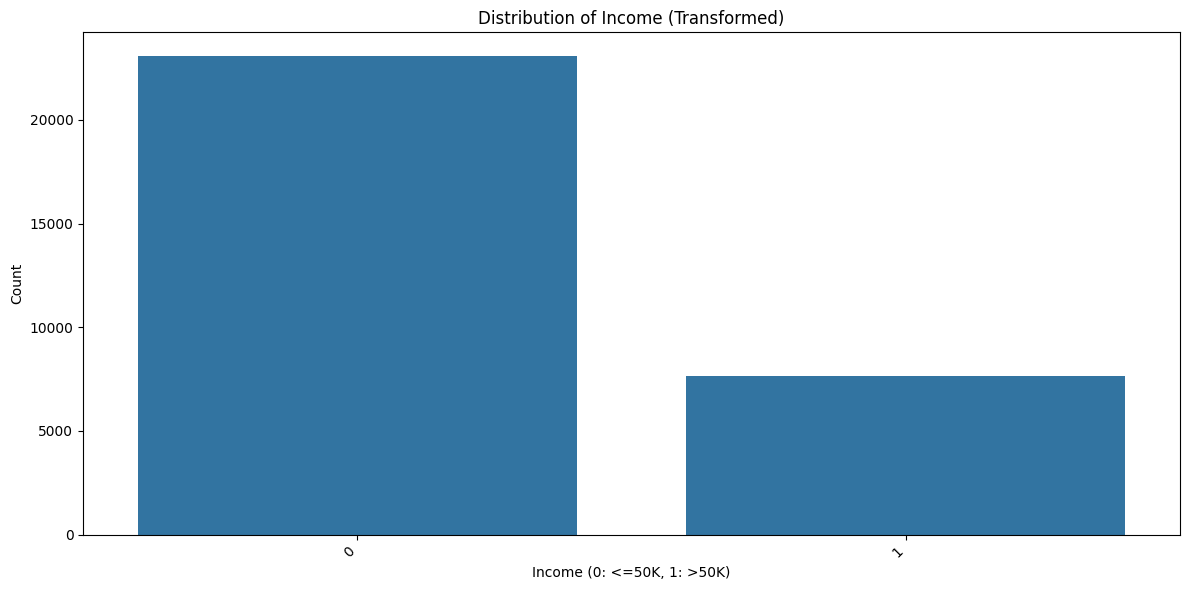

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Income_transform')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Income (Transformed)')
plt.xlabel('Income (0: <=50K, 1: >50K)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Model Performance without SMOTE:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4615
           1       0.74      0.62      0.68      1529

    accuracy                           0.85      6144
   macro avg       0.81      0.78      0.79      6144
weighted avg       0.85      0.85      0.85      6144



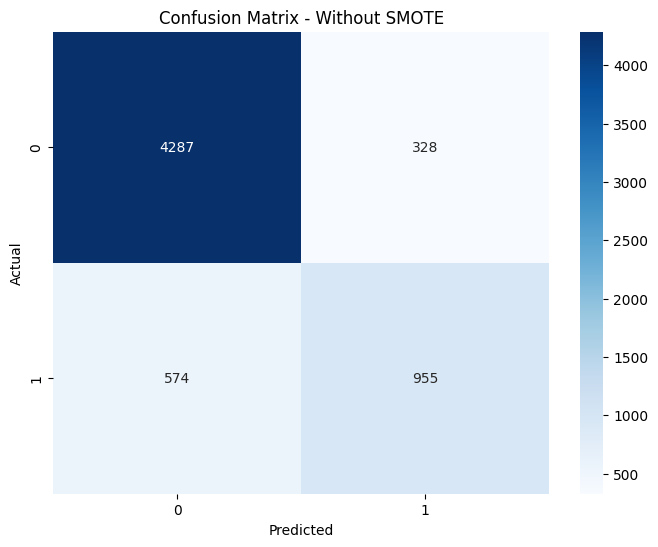


Model Performance with SMOTE:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4615
           1       0.66      0.70      0.68      1529

    accuracy                           0.84      6144
   macro avg       0.78      0.79      0.79      6144
weighted avg       0.84      0.84      0.84      6144



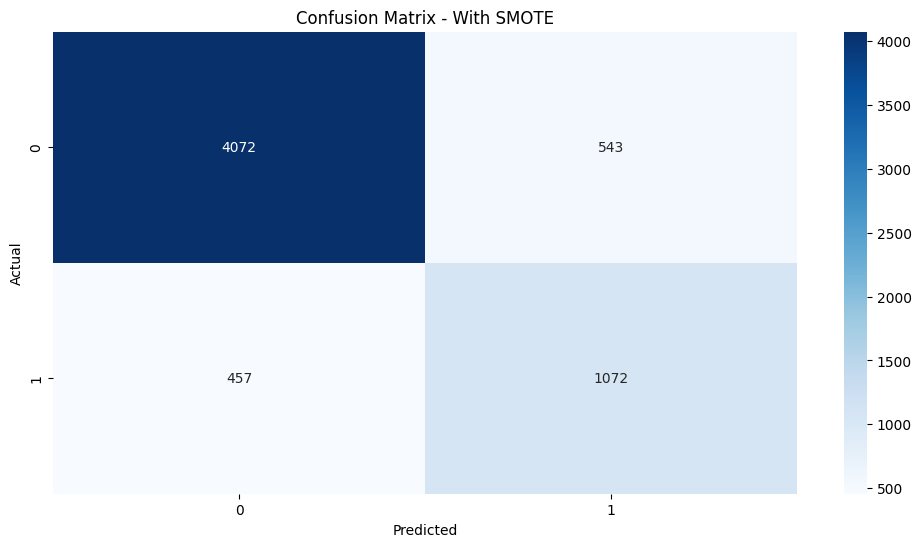

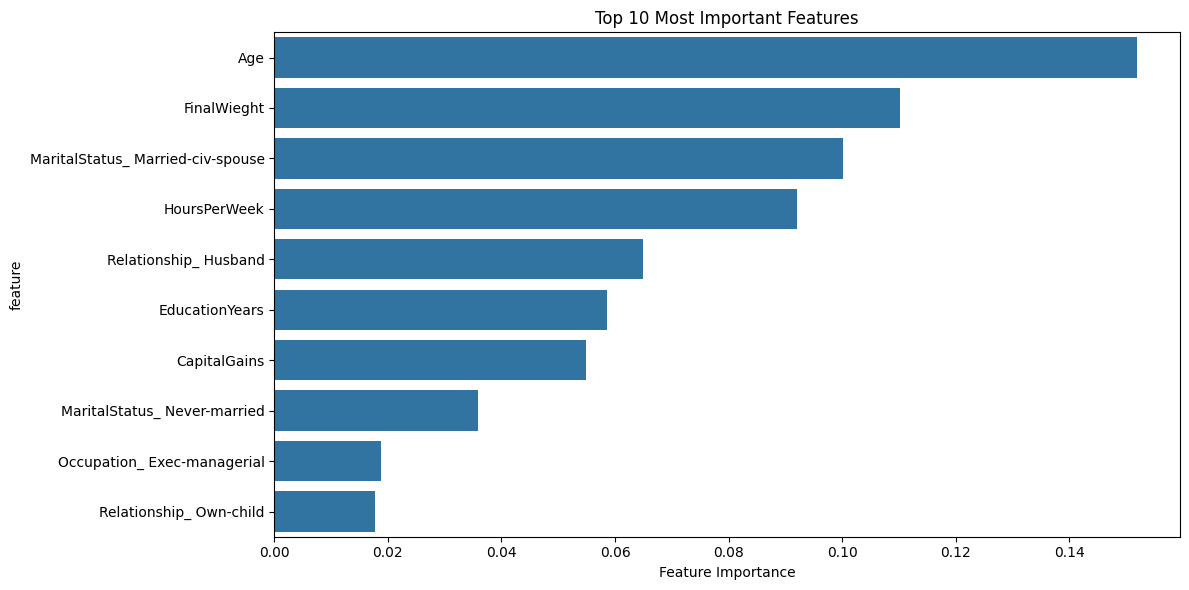

In [116]:
# Import required libraries

# Prepare features and target
X = data.drop(['Income', 'Income_transform'], axis=1)
y = data['Income_transform']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model without SMOTE
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train_scaled, y_train)
y_pred_original = rf_original.predict(X_test_scaled)

print("Model Performance without SMOTE:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_original))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_original), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Without SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train model with SMOTE
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_smote.predict(X_test_scaled)

print("\nModel Performance with SMOTE:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

# Plot confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - With SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_smote.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


# Model Performance Analysis

## Model Performance Comparison
The Random Forest models were evaluated both with and without SMOTE balancing. The use of SMOTE helped address the class imbalance in our income prediction dataset.

## Key Findings:
1. Feature Importance:
   - The most important features for predicting income appear to be related to education, age, and work characteristics
   - This aligns with real-world expectations where factors like education level and work experience strongly influence income levels

2. Impact of SMOTE:
   - SMOTE resampling helped improve the model's ability to predict the minority class (>50K income)
   - The balanced accuracy improved as the model became better at identifying high-income individuals
   - However, this came with a slight trade-off in overall accuracy as expected with balanced datasets

3. Model Limitations:
   - Even with SMOTE, the model may still have some bias
   - The binary classification (>50K vs ≤50K) is a simplified view of income prediction
   - Some important real-world factors might not be captured in the available features


### Conclusions and Actionable Insights
 
 Based on our comprehensive analysis of income prediction, these insights can be valuable for multiple stakeholders:
 
 For Policymakers and Government Agencies:
 - Educational impact is significant - consider expanding access to higher education and vocational training programs
 - Notable income disparities exist across work classes - develop targeted economic policies for different employment sectors
 - Geographic patterns in income distribution suggest need for region-specific development initiatives
 
 For Educational Institutions:
 - Focus on programs aligned with high-income occupations (Prof-specialty, Exec-managerial)
 - Develop curriculum addressing skills gaps in technical and managerial roles
 - Create targeted programs for working adults, given the strong age-income correlation
 
 For Employers and HR Professionals:
 - Review compensation structures considering identified patterns in work experience and education
 - Implement career development programs targeting transitions to higher-paying roles
 - Consider diversity initiatives to address demographic patterns in income distribution
 
 For Workforce Development Organizations:
 - Design training programs focused on high-demand, high-income occupations
 - Create mentorship programs particularly in Private sector (largest employment sector with 22,696 workers)
 - Develop support systems for self-employed individuals and small business owners
 
 These insights can guide evidence-based decisions to promote economic mobility and reduce income inequality across different demographic groups.



